In [1]:
import pandas as pd

In [2]:
import os

In [7]:
df=pd.DataFrame(columns=['Calory','Breakfast','Lunch','Dinner','Exercise','Body Shape'])

In [8]:
df.loc[0]=[1200,1,0,0,2,'Skinny']
df.loc[1]=[2800,1,1,1,1,'Fat']
df.loc[2]=[3500,2,2,1,0,'Skinny']
df.loc[3]=[1400,0,1,0,3,'Skinny']
df.loc[4]=[1600,1,0,2,0,'Normal']
df.loc[5]=[3200,1,2,1,1,'Fat']
df.loc[6]=[1750,1,0,0,1,'Skinny']
df.loc[7]=[1600,1,0,0,0,'Skinny']

In [10]:
x=df[['Calory','Breakfast','Lunch','Dinner','Exercise']]
y=df[['Body Shape']]

In [11]:
x

,Calory,Breakfast,Lunch,Dinner,Exercise
0,1200.0,1.0,0.0,0.0,2.0
1,2800.0,1.0,1.0,1.0,1.0
2,3500.0,2.0,2.0,1.0,0.0
3,1400.0,0.0,1.0,0.0,3.0
4,1600.0,1.0,0.0,2.0,0.0
5,3200.0,1.0,2.0,1.0,1.0
6,1750.0,1.0,0.0,0.0,1.0
7,1600.0,1.0,0.0,0.0,0.0


In [12]:
y

,Body Shape
0,Skinny
1,Fat
2,Skinny
3,Skinny
4,Normal
5,Fat
6,Skinny
7,Skinny


In [13]:
# use standard scaler for normalization where all values fir b/w 1 and -1
from sklearn.preprocessing import StandardScaler

In [14]:
x_std=StandardScaler().fit_transform(x)

In [15]:
x_std

array([[-1.11558076,  0.        , -0.90453403, -0.89802651,  1.        ],
       [ 0.80112175,  0.        ,  0.30151134,  0.53881591,  0.        ],
       [ 1.6396791 ,  2.        ,  1.50755672,  0.53881591, -1.        ],
       [-0.87599295, -2.        ,  0.30151134, -0.89802651,  2.        ],
       [-0.63640513,  0.        , -0.90453403,  1.97565832, -1.        ],
       [ 1.28029738,  0.        ,  1.50755672,  0.53881591,  0.        ],
       [-0.45671427,  0.        , -0.90453403, -0.89802651,  0.        ],
       [-0.63640513,  0.        , -0.90453403, -0.89802651, -1.        ]])

In [16]:
# taditional method using covariance matrix 

In [17]:
import numpy as np

In [18]:
features=x_std.T

In [19]:
covariance_matrix=np.cov(features)

In [20]:
print(covariance_matrix)

[[ 1.14285714  0.71876344  0.99327861  0.50254343 -0.46206221]
 [ 0.71876344  1.14285714  0.34458439  0.4105264  -0.85714286]
 [ 0.99327861  0.34458439  1.14285714  0.30944592  0.        ]
 [ 0.50254343  0.4105264   0.30944592  1.14285714 -0.61578961]
 [-0.46206221 -0.85714286  0.         -0.61578961  1.14285714]]


In [21]:
eig_vals,eig_vecs=np.linalg.eig(covariance_matrix)

In [22]:
eig_vals

array([ 3.27441798,  1.45624642,  0.76738755,  0.04381948,  0.17241429])

In [23]:
eig_vecs

array([[-0.5280066 , -0.36211573,  0.09871934, -0.72991473, -0.21808304],
       [-0.48707906,  0.25394454,  0.50704723,  0.09868943,  0.65683306],
       [-0.38235201, -0.66516033, -0.02728186,  0.63288523, -0.10040255],
       [-0.39654445,  0.20592409, -0.84839659, -0.01474525,  0.28346707],
       [ 0.42487935, -0.56527991, -0.11241234, -0.2381675 ,  0.6561828 ]])

In [24]:
print("\nEigen values\n%s"%eig_vals)


Eigen values
[ 3.27441798  1.45624642  0.76738755  0.04381948  0.17241429]


In [25]:
# first pca=first eigen values/sum all the eigen values
eig_vals[0]/sum(eig_vals)


0.57302314643779917

In [26]:
projected_x=x_std.dot(eig_vecs.T[0])

In [27]:
projected_x

array([ 1.71587119, -0.7519455 , -3.05488065,  2.52727084, -0.52643918,
       -1.46608726,  0.94310598,  0.61310459])

In [29]:
result=pd.DataFrame(projected_x,columns=['PC1'])#PC1 
result['y-axis']=0.0
result['label']=y
result

,PC1,y-axis,label
0,1.715871,0.0,Skinny
1,-0.751945,0.0,Fat
2,-3.054881,0.0,Skinny
3,2.527271,0.0,Skinny
4,-0.526439,0.0,Normal
5,-1.466087,0.0,Fat
6,0.943106,0.0,Skinny
7,0.613105,0.0,Skinny


In [31]:
import matplotlib.pyplot as plt

In [32]:
import seaborn as sns

In [33]:
%matplotlib inline

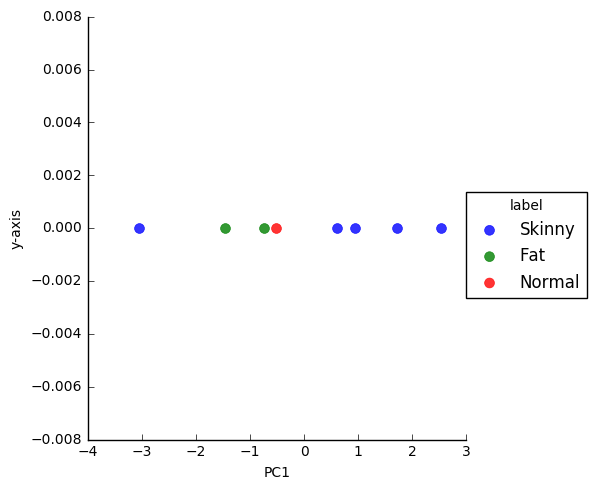

In [36]:
sns.lmplot('PC1','y-axis',data=result,fit_reg=False,scatter_kws={'s':50},hue='label')
